In [42]:
#This is our SEIRVF model for the Covid-19 pandemic. 
#We improved the original SIR model by implementing differential equations for exposure, fatality and vaccination.

In [43]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# describing the model with differential equations
def deriv(y, t, N, alpha, beta, gamma, delta, epsilon):  
    S, E, V, I, F, R = y     # Susceptible, Exposed, Vaccinated, Infected, Fatal, Recovered
    
    dSdt = -beta * S * I / N - epsilon(I) * S
    dEdt = beta * S * I / N - gamma * E - epsilon(I) * E
    dVdt = epsilon(I) * (S + E)
    dIdt = gamma * E - delta * I
    dFdt = alpha * I
    dRdt = delta * I - alpha * I + epsilon(I) * (S + E)
    
    return dSdt, dEdt, dVdt, dIdt, dFdt, dRdt

In [45]:
# describing the parameters
N = 100000             # population (S + E + I + R + F = N)
beta = 2.5             # rate of infection
gamma = 1/7            # incubation period  
delta = 1/5            # rate of recovery
alpha = 0.01           # mortality rate

# implementing vaccination when 15% of the population is infected
def epsilon(n):        
    if n > N * 0.15:
        return 0.1     # 10% of S+E get vaccinated and recover (can be changed)
    else:
        return 0  

S0, E0, V0, I0, F0, R0 = N-1, 0, 0, 1, 0, 0  # initial conditions: one infected

In [46]:
t = np.linspace(0, 89, 1000)     # grid of time points (in days)
y0 = S0, E0, V0, I0, F0, R0      # initial conditions vector

# integrating the SEIRFV equations over the time grid, t
ret = odeint(deriv, y0, t, args=(N, alpha, beta, gamma, delta, epsilon))
S, E, V, I, F, R = ret.T

In [47]:
# plotting the graph
def plot(t, S, E, V, I, F, R):
  f, ax = plt.subplots(1, 1, figsize=(10, 4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'orange', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, F, 'r', alpha=0.7, linewidth=2, label='Fatal')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, V, 'purple', alpha=0.7, linewidth=1, linestyle='--', label='Vaccinated')
  
  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Plot.png")
  plt.show()

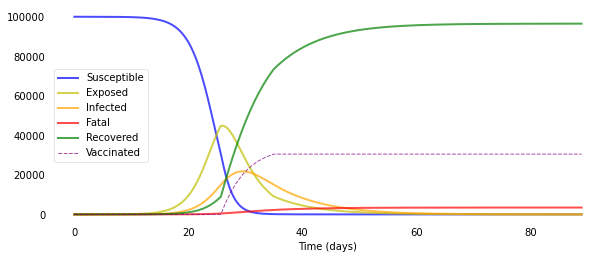

In [48]:
plot(t, S, E, V, I, F, R)